In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
#Load and Prepare Data
# Load dataset
df = pd.read_csv("C:\\data science\\assignment\\monthly_milk_production.csv")

# Rename columns for safety
df.columns = ['Month', 'Production']

# Convert Month to datetime
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

print(df.head())

            Production
Month                 
1962-01-01         589
1962-02-01         561
1962-03-01         640
1962-04-01         656
1962-05-01         727


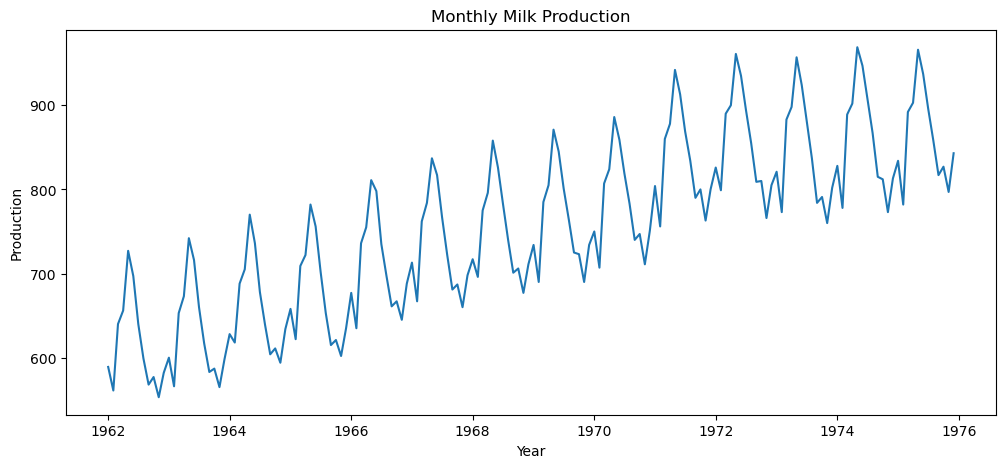

In [24]:
#Exploratory Data Analysis (EDA)
plt.figure(figsize=(12,5))
plt.plot(df['Production'])
plt.title("Monthly Milk Production")
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

In [26]:
#Check Missing Values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Production    0
dtype: int64


In [27]:
#Normalize Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Production']])
print(scaler )
print(scaled_data)

MinMaxScaler()
[[0.08653846]
 [0.01923077]
 [0.20913462]
 [0.24759615]
 [0.41826923]
 [0.34615385]
 [0.20913462]
 [0.11057692]
 [0.03605769]
 [0.05769231]
 [0.        ]
 [0.06971154]
 [0.11298077]
 [0.03125   ]
 [0.24038462]
 [0.28846154]
 [0.45432692]
 [0.39182692]
 [0.25721154]
 [0.15384615]
 [0.07211538]
 [0.08173077]
 [0.02884615]
 [0.10817308]
 [0.18028846]
 [0.15625   ]
 [0.32451923]
 [0.36538462]
 [0.52163462]
 [0.43990385]
 [0.30048077]
 [0.20673077]
 [0.12259615]
 [0.13942308]
 [0.09855769]
 [0.19471154]
 [0.25240385]
 [0.16586538]
 [0.375     ]
 [0.40625   ]
 [0.55048077]
 [0.48798077]
 [0.35817308]
 [0.24038462]
 [0.14903846]
 [0.16346154]
 [0.11778846]
 [0.19711538]
 [0.29807692]
 [0.19711538]
 [0.43990385]
 [0.48557692]
 [0.62019231]
 [0.58894231]
 [0.4375    ]
 [0.34615385]
 [0.25961538]
 [0.27403846]
 [0.22115385]
 [0.32451923]
 [0.38461538]
 [0.27403846]
 [0.50240385]
 [0.55528846]
 [0.68269231]
 [0.63461538]
 [0.51442308]
 [0.40625   ]
 [0.30769231]
 [0.32211538]
 [0.2

In [29]:
#Create Time Sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 12   # 12 months

X, y = create_sequences(scaled_data, window_size)
print(X, y)

[[[0.08653846]
  [0.01923077]
  [0.20913462]
  ...
  [0.05769231]
  [0.        ]
  [0.06971154]]

 [[0.01923077]
  [0.20913462]
  [0.24759615]
  ...
  [0.        ]
  [0.06971154]
  [0.11298077]]

 [[0.20913462]
  [0.24759615]
  [0.41826923]
  ...
  [0.06971154]
  [0.11298077]
  [0.03125   ]]

 ...

 [[0.62259615]
  [0.52884615]
  [0.625     ]
  ...
  [0.82451923]
  [0.73317308]
  [0.63461538]]

 [[0.52884615]
  [0.625     ]
  [0.67548077]
  ...
  [0.73317308]
  [0.63461538]
  [0.65865385]]

 [[0.625     ]
  [0.67548077]
  [0.55048077]
  ...
  [0.63461538]
  [0.65865385]
  [0.58653846]]] [[0.11298077]
 [0.03125   ]
 [0.24038462]
 [0.28846154]
 [0.45432692]
 [0.39182692]
 [0.25721154]
 [0.15384615]
 [0.07211538]
 [0.08173077]
 [0.02884615]
 [0.10817308]
 [0.18028846]
 [0.15625   ]
 [0.32451923]
 [0.36538462]
 [0.52163462]
 [0.43990385]
 [0.30048077]
 [0.20673077]
 [0.12259615]
 [0.13942308]
 [0.09855769]
 [0.19471154]
 [0.25240385]
 [0.16586538]
 [0.375     ]
 [0.40625   ]
 [0.55048077]


In [30]:
#Train / Validation / Test Split
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]

X_test = X[train_size+val_size:]
y_test = y[train_size+val_size:]

print(train_size)
print(val_size)
print(X_train)
print(y_train)
print(X_val)
print(y_val)
print(X_test )
print(y_test)

109
23
[[[0.08653846]
  [0.01923077]
  [0.20913462]
  ...
  [0.05769231]
  [0.        ]
  [0.06971154]]

 [[0.01923077]
  [0.20913462]
  [0.24759615]
  ...
  [0.        ]
  [0.06971154]
  [0.11298077]]

 [[0.20913462]
  [0.24759615]
  [0.41826923]
  ...
  [0.06971154]
  [0.11298077]
  [0.03125   ]]

 ...

 [[0.37980769]
  [0.47596154]
  [0.60336538]
  ...
  [0.67548077]
  [0.56971154]
  [0.59375   ]]

 [[0.47596154]
  [0.60336538]
  [0.48798077]
  ...
  [0.56971154]
  [0.59375   ]
  [0.50480769]]

 [[0.60336538]
  [0.48798077]
  [0.73798077]
  ...
  [0.59375   ]
  [0.50480769]
  [0.59375   ]]]
[[0.11298077]
 [0.03125   ]
 [0.24038462]
 [0.28846154]
 [0.45432692]
 [0.39182692]
 [0.25721154]
 [0.15384615]
 [0.07211538]
 [0.08173077]
 [0.02884615]
 [0.10817308]
 [0.18028846]
 [0.15625   ]
 [0.32451923]
 [0.36538462]
 [0.52163462]
 [0.43990385]
 [0.30048077]
 [0.20673077]
 [0.12259615]
 [0.13942308]
 [0.09855769]
 [0.19471154]
 [0.25240385]
 [0.16586538]
 [0.375     ]
 [0.40625   ]
 [0.550

In [31]:
#Build Models
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
print(early_stop)

In [32]:
#Simple RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='tanh', input_shape=(window_size,1)))
model_rnn.add(Dense(1))

model_rnn.compile(optimizer='adam', loss='mse')

model_rnn.fit(X_train, y_train,
              epochs=100,
              batch_size=16,
              validation_data=(X_val, y_val),
              callbacks=[early_stop],
              verbose=0)

In [33]:
#LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='tanh', input_shape=(window_size,1)))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.fit(X_train, y_train,
               epochs=100,
               batch_size=16,
               validation_data=(X_val, y_val),
               callbacks=[early_stop],
               verbose=0)

In [34]:
#GRU
model_gru = Sequential()
model_gru.add(GRU(50, activation='tanh', input_shape=(window_size,1)))
model_gru.add(Dense(1))

model_gru.compile(optimizer='adam', loss='mse')

model_gru.fit(X_train, y_train,
              epochs=100,
              batch_size=16,
              validation_data=(X_val, y_val),
              callbacks=[early_stop],
              verbose=0)

In [35]:
#Model Evaluation
#Make Predictions
def evaluate_model(model):
    pred = model.predict(X_test)
    pred = scaler.inverse_transform(pred)
    actual = scaler.inverse_transform(y_test)
    
    rmse = math.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mape = np.mean(np.abs((actual - pred) / actual)) * 100
    
    return actual, pred, rmse, mae, mape

actual_rnn, pred_rnn, rmse_rnn, mae_rnn, mape_rnn = evaluate_model(model_rnn)
actual_lstm, pred_lstm, rmse_lstm, mae_lstm, mape_lstm = evaluate_model(model_lstm)
actual_gru, pred_gru, rmse_gru, mae_gru, mape_gru = evaluate_model(model_gru)

print("RNN  -> RMSE:", rmse_rnn, " MAE:", mae_rnn, " MAPE:", mape_rnn)
print("LSTM -> RMSE:", rmse_lstm, " MAE:", mae_lstm, " MAPE:", mape_lstm)
print("GRU  -> RMSE:", rmse_gru, " MAE:", mae_gru, " MAPE:", mape_gru)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
RNN  -> RMSE: 18.72978140435743  MAE: 14.879915873209626  MAPE: 1.740714055114152
LSTM -> RMSE: 116.51648729337649  MAE: 99.43424479166667  MAPE: 11.144967106509055
GRU  -> RMSE: 162.22613214078555  MAE: 151.10740661621094  MAPE: 17.191755186002382


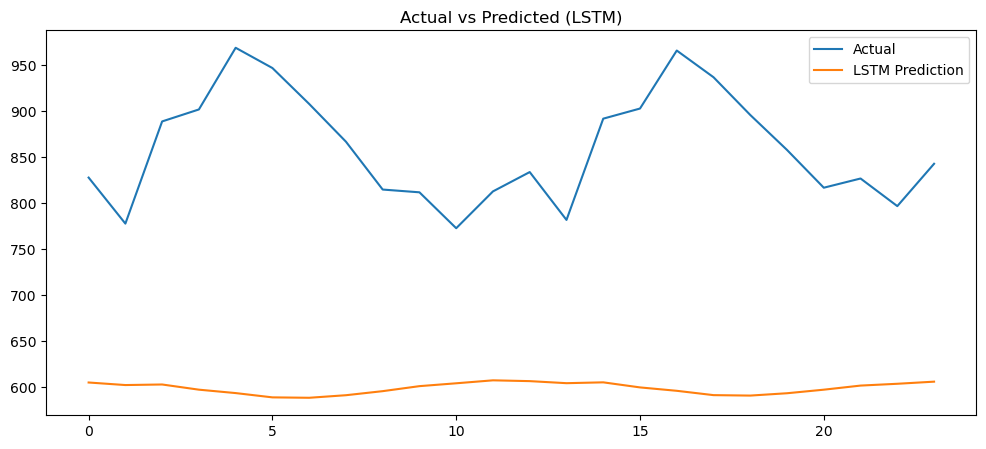

In [17]:
#Plot Predictions
plt.figure(figsize=(12,5))
plt.plot(actual_lstm, label="Actual")
plt.plot(pred_lstm, label="LSTM Prediction")
plt.legend()
plt.title("Actual vs Predicted (LSTM)")
plt.show()

In [36]:
#Forecast Next 12 Months
def forecast_future(model, last_window, steps):
    future = []
    current_window = last_window.copy()
    
    for _ in range(steps):
        pred = model.predict(current_window.reshape(1, window_size, 1))
        future.append(pred[0][0])
        current_window = np.append(current_window[1:], pred)
    
    future = scaler.inverse_transform(np.array(future).reshape(-1,1))
    return future

last_window = scaled_data[-window_size:]

future_12 = forecast_future(model_lstm, last_window, 12)

print("Next 12 Months Forecast:\n", future_12)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Next 12 Months Forecast:
 [[759.7913 ]
 [750.03424]
 [741.2362 ]
 [731.2613 ]
 [721.5653 ]
 [711.53613]
 [702.41394]
 [694.3066 ]
 [687.11786]
 [680.8325 ]
 [674.76086]
 [669.4073 ]]


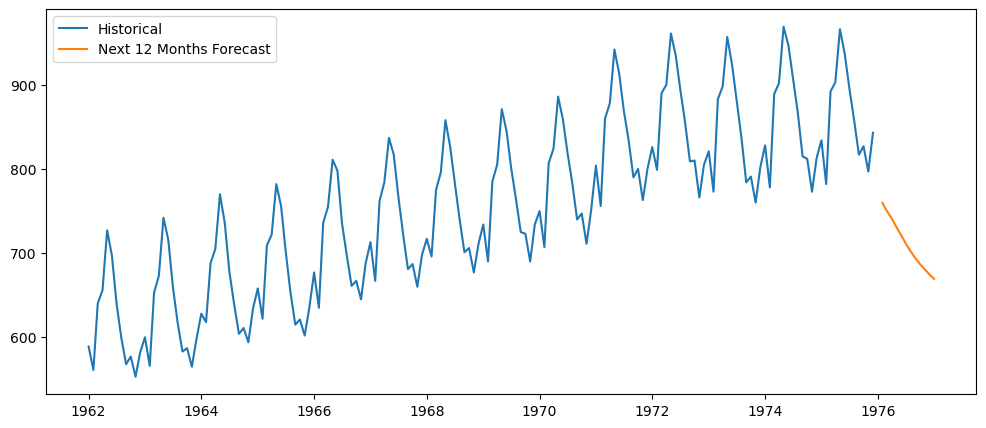

In [37]:
#Plot Future Forecast
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Production'], label="Historical")
future_dates = pd.date_range(df.index[-1], periods=13, freq='M')[1:]
plt.plot(future_dates, future_12, label="Next 12 Months Forecast")
plt.legend()
plt.show()

In [38]:
#Business Insights

#Based on forecast:
#Plan storage before peak production months.
#Prepare workforce during high production season.
#Avoid waste in low production months.
#Improve supply chain efficiency.
#Support long-term production scaling decisions.

In [21]:
#Conclusion

#Data shows strong seasonal pattern.
#Deep learning models captured trends successfully.
#LSTM/GRU gave better accuracy than simple RNN.
#Forecasting improves operational efficiency and profit planning.